# Stats 131 Final Project
### Group: The S.S. Minnow Johnson


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Context and description of the data


In [2]:
#games = pd.read_csv(r'C:\Users\Patrick Tawil\Desktop\Stats131\Stats131Project\Datasets\Video_Games_Sales.csv')
games = pd.read_csv('Video_Games_Sales.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
games.shape

(16719, 16)

Background information on the subject and field of study

This dataset contains information on video game sales and ratings as of December 22, 2016. Video games serve as a huge form of entertainment for millions of people around the world and its audience continues to grow with the rise of eSports. With over 16,000 games included in the dataset from genres including Adventure and Strategy to release years as early as 1980, video games showcase the immense creativity from the various developers and publishers over the decades. We will be able to explore individual video game sales across regions and globally as well as how critics and users rated these games.



Information about data collection.

a. Who collected the data

This dataset was found on Kaggle (https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/data) by a user named Rush Kirubi.

b. When the data was collected

The data was uploaded to Kaggle by Kirubi one year ago.

c. How the data was collected

The dataset is comprised of two data sources, one containing information on the video game sales (columns 1-10) and the other on the ratings (columns 11-16). The sales data is taken from VGChartz, which is a video game sales tracking website, and the ratings data is taken from Metacritic, which is a website that aggregates reviews of media products such as video games. The data sources are presumably merged by the video game name.

d. Any implications this may have on analysis

Because the data is coming from different sources, there could have possibly been inconsistencies in how the video game names were written, which would result in the data sources not being able to merge properly. This is possibly confirmed when looking at the dataset information, where most of the null data comes from the rating columns coming from Metacritic.

# 2. Exploratory Data Analysis

Data cleaning

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
#2 game names that are null, also see that genre is null
games[games.Name.isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#since only 2 observations, willing to look up actual info, found on VGChartz
games.loc[659,"Name"] = 'Mortal Kombat'
games.loc[14246,"Name"] = 'Mortal Kombat II'
games.loc[[659,14246],"Genre"] = 'Fighting'

In [8]:
games.loc[[659,14246]]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,Mortal Kombat,GEN,1993.0,Fighting,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,Mortal Kombat II,GEN,1993.0,Fighting,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [10]:
#change game that has release year 2020 to 2009
games[games["Year_of_Release"] == 2020]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E


In [11]:
games.loc[5936,"Year_of_Release"] = 2009
games.loc[5936,:]

Name               Imagine: Makeup Artist
Platform                               DS
Year_of_Release                      2009
Genre                          Simulation
Publisher                         Ubisoft
NA_Sales                             0.27
EU_Sales                                0
JP_Sales                                0
Other_Sales                          0.02
Global_Sales                         0.29
Critic_Score                          NaN
Critic_Count                          NaN
User_Score                            tbd
User_Count                            NaN
Developer                         Ubisoft
Rating                                  E
Name: 5936, dtype: object

In [12]:
#change user score that has tbd to NaN
games.User_Score[games.User_Score == 'tbd'].count()

2425

In [13]:
games.User_Score = games.User_Score.replace('tbd', np.nan)

In [14]:
#change type from string to float
games.User_Score = games.User_Score.astype(float)

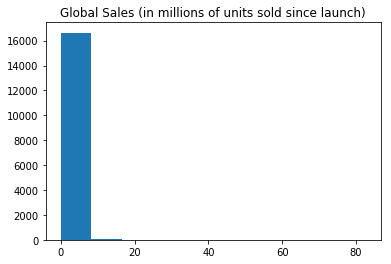

In [15]:
plt.hist(games.Global_Sales) #similar distribution for all other sales variables
plt.title('Global Sales (in millions of units sold since launch)')
plt.show()

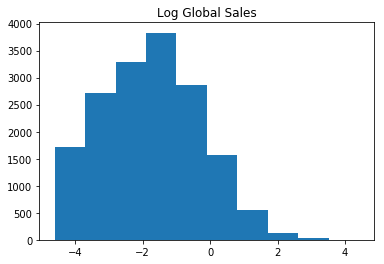

In [16]:
plt.hist(np.log(games.Global_Sales))
plt.title('Log Global Sales')
plt.show() #better distribution even though still skewed

In [17]:
#create new log sales variable
Log_Global_Sales = np.log(games.Global_Sales)
games['Log_Global_Sales'] = Log_Global_Sales
print(games['Log_Global_Sales'].head())

0    4.413162
1    3.694862
2    3.570096
3    3.489513
4    3.445852
Name: Log_Global_Sales, dtype: float64


Exploratory Analysis

### Which Developers make the most games?

                 Developer
Ubisoft                204
EA Sports              172
EA Canada              167
Konami                 162
Capcom                 139
EA Tiburon             108
Electronic Arts        104
Others                9040


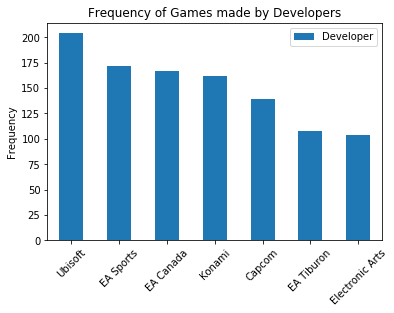

In [18]:
"""This will get the top N most frequent results from the column specified. If True, the Others parameter will also add a Others category
to merge up all the smaller values together."""

def get_top_n_frequency(df, n, col_name, others = True):
    df_count = df[col_name].value_counts()
    topN = pd.DataFrame(df_count[:n])
    if not others:
        return topN
    others = pd.Series({"Others" : df_count[n:].sum()}, name = col_name)
    others_df = pd.DataFrame(others)
    return topN.append(others_df)


top_devs_with_others = get_top_n_frequency(games, 7, "Developer", others=True)
print(top_devs_with_others)
top_devs_without_others = get_top_n_frequency(games, 7, "Developer", others=False)

top_devs_without_others.plot(kind = "bar")
plt.xticks(rotation = 45)
plt.ylabel("Frequency")
plt.title("Frequency of Games made by Developers")
plt.show()

### Who are the biggest Publishers?

                              Publisher
Electronic Arts                    1356
Activision                          985
Namco Bandai Games                  939
Ubisoft                             933
Konami Digital Entertainment        834
THQ                                 715
Nintendo                            706
Others                            10197


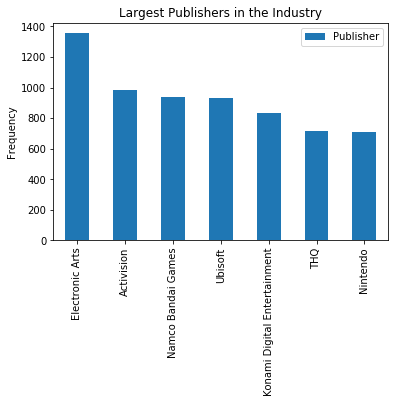

In [19]:
top_pubs_with_others = get_top_n_frequency(games, 7, "Publisher", others=True)
print(top_pubs_with_others)
top_pubs_without_others = get_top_n_frequency(games, 7, "Publisher", others=False)

top_pubs_without_others.plot(kind = "bar")
plt.ylabel("Frequency")
plt.title("Largest Publishers in the Industry")
plt.show()

### Which Platform has the most games?

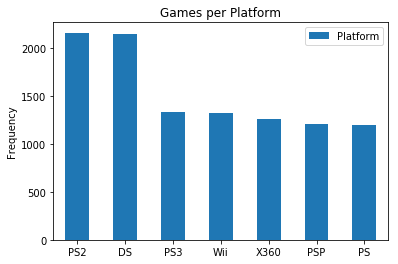

In [20]:
get_top_n_frequency(games, 7, "Platform", others=False).plot(kind="bar")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.title("Games per Platform")
plt.show()

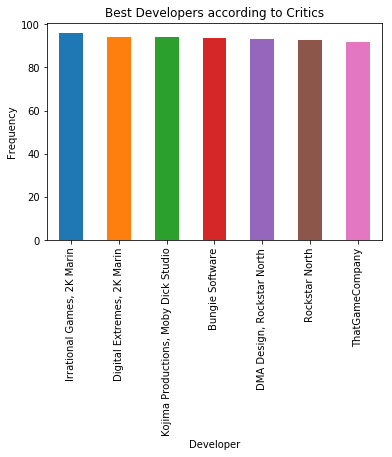

In [21]:
#Maybe look into how many games those devs actually made, maybe 1 hit wonders are something to ignore, we'd have to
#agree on a value to pick

#If the only given value is NaN then we'll get NaN otherwise it's skipped
mean_scores_by_dev = games.groupby("Developer")["Critic_Score"].mean()
best_devs = mean_scores_by_dev.sort_values(ascending=False).head(7)
best_devs.plot(kind = "bar")
plt.ylabel("Frequency") ## shouldnt this be Mean??
plt.title("Best Developers according to Critics")
plt.show()

In [22]:
games[games.Critic_Count > 25].groupby("Developer")["Critic_Score"].mean().sort_values(ascending=False).head(7)

Developer
DMA Design                              97.000000
Irrational Games, 2K Marin              96.000000
Aspect                                  94.000000
Digital Extremes, 2K Marin              94.000000
Bungie Software                         93.666667
Kojima Productions, Moby Dick Studio    93.000000
EA Sports Big                           93.000000
Name: Critic_Score, dtype: float64

In [23]:
games[games.User_Count > 150].groupby("Developer")["Critic_Score"].mean().sort_values(ascending=False).head(7)

Developer
DMA Design                    97.000000
Rockstar North                96.090909
Bungie Software               96.000000
Irrational Games, 2K Marin    96.000000
Rockstar San Diego            95.000000
SCE/WWS, Media Molecule       95.000000
Aspect                        94.000000
Name: Critic_Score, dtype: float64

In [24]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Log_Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,4.413162
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,3.694862
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,3.570096
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,3.489513
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,3.445852


In [25]:
# correlation between some variables
print(games[['User_Score','Critic_Score']].corr())
print(games[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr())

              User_Score  Critic_Score
User_Score      1.000000      0.580878
Critic_Score    0.580878      1.000000
              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales      1.000000  0.765336  0.449598     0.638654      0.941010
EU_Sales      0.765336  1.000000  0.435068     0.722796      0.901239
JP_Sales      0.449598  0.435068  1.000000     0.291096      0.612300
Other_Sales   0.638654  0.722796  0.291096     1.000000      0.749242
Global_Sales  0.941010  0.901239  0.612300     0.749242      1.000000


In [26]:
games['Decade'] = pd.cut(games['Year_of_Release'], [1980,1990,2000,2010,2020], right=False)
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Log_Global_Sales,Decade
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,4.413162,"[2000, 2010)"
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,3.694862,"[1980, 1990)"
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,3.570096,"[2000, 2010)"
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,3.489513,"[2000, 2010)"
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,3.445852,"[1990, 2000)"


In [27]:
print(games.groupby(['Decade'])["Global_Sales"].describe())
print(games.groupby(['Decade'])["Log_Global_Sales"].describe())

               count      mean       std   min   25%   50%   75%    max
Decade                                                                 
[1980, 1990)   205.0  1.836976  4.365494  0.02  0.40  0.85  1.56  40.24
[1990, 2000)  1771.0  0.723495  1.619275  0.01  0.10  0.27  0.69  31.37
[2000, 2010)  9194.0  0.502313  1.579266  0.01  0.06  0.17  0.45  82.53
[2010, 2020)  5280.0  0.482042  1.235503  0.01  0.04  0.13  0.40  21.81
               count      mean       std       min       25%       50%  \
Decade                                                                   
[1980, 1990)   205.0 -0.177854  1.142126 -3.912023 -0.916291 -0.162519   
[1990, 2000)  1771.0 -1.299384  1.364989 -4.605170 -2.302585 -1.309333   
[2000, 2010)  9194.0 -1.757085  1.419602 -4.605170 -2.813411 -1.771957   
[2010, 2020)  5280.0 -1.953684  1.516436 -4.605170 -3.218876 -2.040221   

                   75%       max  
Decade                            
[1980, 1990)  0.444686  3.694862  
[1990, 2000) -0.37

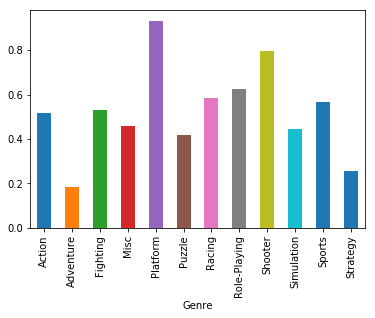

In [28]:
# making some plots
genre = games.groupby(['Genre'])["Global_Sales"].mean()
genre.plot(kind='bar')

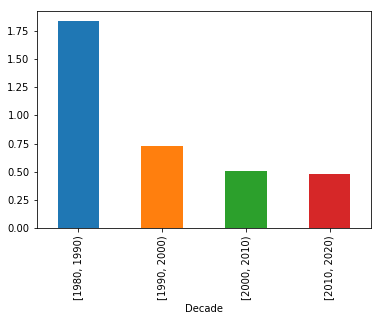

In [29]:
dec_mean = games.groupby(['Decade'])["Global_Sales"].mean()
dec_mean.plot(kind='bar')
#makes sense because sales are based on how much copies sold since launch, so they add up over time

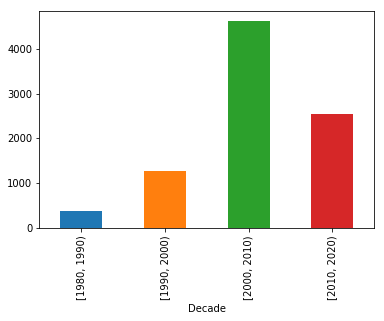

In [30]:
dec_sum = games.groupby(['Decade'])["Global_Sales"].sum()
dec_sum.plot(kind='bar')

# 3. Data modeling